In [1]:
"""
source: matplotlib tutorial
http://matplotlib.org/users/image_tutorial.html
"""

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.image import cm

import mnist_database

db = mnist_database.mnist_database('../data/mnist')

(images, labels) = db.get_training_data()

(images_training, labels_training) = (images, labels)
(images_testing, labels_testing) = db.get_testing_data()

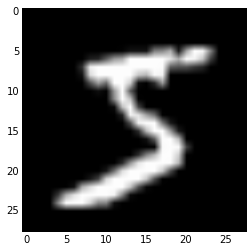

number of images: 60000


In [3]:
# view the first image of the dataset and print the number of images

imgplot = plt.imshow(images[0].reshape((28,28)), cmap=cm.gray)
plt.show()

print( 'number of images: %d' % len(images) )

In [1]:
from sklearn.svm import SVC

from classifier_test import classifier_test

test_bench = classifier_test( n_training_vectors=1000, n_testing_vectors=10000 )

results = test_bench.test_classifiers( [SVC(kernel='poly', coef0=1, degree=3),
                                        SVC(kernel='poly', coef0=2, degree=3)], processes=2 )


In [2]:
for (rate, matr) in results:
    print(matr)
    print('correctly classified: %f' % rate)



[[ 915   11    5    1    2   26    9    6    2    3]
 [   0 1101    1    3    0    1    4    2   22    1]
 [  17   31  910    4   10    4   11   26   17    2]
 [   1   26   20  833    1   67    3   19   32    8]
 [   1   18    4    0  869    2   14    2    1   71]
 [   4   30    5   32    9  778   11    8    5   10]
 [  13   22   12    0   12   25  871    1    2    0]
 [   1   33   16   10   14    1    0  923    0   30]
 [  33   10   10   36   10   26    9   19  777   44]
 [  11   14    4   13   46    6    0   24    2  889]]
correctly classified: 0.886600
[[ 915   11    5    1    2   26    9    6    2    3]
 [   0 1101    1    3    0    1    4    2   22    1]
 [  17   31  910    4   10    4   11   26   17    2]
 [   1   25   20  834    1   66    3   20   32    8]
 [   1   18    4    0  869    2   14    2    1   71]
 [   4   30    5   32    9  778   11    8    5   10]
 [  13   22   12    0   12   25  871    1    2    0]
 [   1   33   16   10   14    1    0  923    0   30]
 [  33   10   

In [4]:
from numpy import zeros, int32


class mnistdb_classifier_test:
    def __init__(self,
                 learning_implementation,
                 training_vectors=len(images_training),
                 testing_vectors=len(images_testing)
                ):
        self.learning_implementation = learning_implementation
        self.trv = training_vectors
        self.tsv = testing_vectors
        self.hits = zeros((10,10), dtype=int32)
    
    def train(self):
        self.learning_implementation.fit(images_training[:self.trv],
                                         labels_training[:self.trv])
        return
    
    def test(self):
        for (t, sol) in zip(images_testing[:self.tsv],
                            labels_testing[:self.tsv]):
            self.hits[sol][self.learning_implementation.predict(t)] += 1
        return
    
    def get_precision(self):
        return sum([self.hits[d][d] for d in range(len(self.hits))]) / float(self.tsv)
    
    def stats(self):
        return self.hits


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import cm
import numpy

from sklearn.tree import DecisionTreeClassifier

def test_decision_tree(optimization='entropy',
                       max_depth_range=range(10,20),
                       max_features_range=range(10,20),
                       training_vectors=60000
                      ):
    
    result = []
    
    for depth in max_depth_range:
        current_depth_results = []
        
        for features in max_features_range:
            m = mnistdb_classifier_test(
                DecisionTreeClassifier(criterion=optimization,
                                       max_depth=depth,
                                       max_features=features),
                training_vectors=training_vectors
            )
            m.train()
            m.test()
            hit_rate = m.get_precision()
            
            print('depth %d, features %d: %.3f' % (depth, features, hit_rate*100) +
                  '% classified correctly')
            current_depth_results.append(hit_rate)

        print('')
        result.append(current_depth_results)
    
    return result

print('calculating trees using the Gini index')
result_gini = test_decision_tree(optimization='gini')
print(result_gini)

print('\n')

print('calculating trees using the entropy:')
result_entropy = test_decision_tree(optimization='entropy')
print(result_entropy)


In [132]:
import pickle

#name = '40x80'
name = 'depth15'

result_gini = pickle.load( open('gini_%s.pkl' % name) )
result_entropy = pickle.load( open('entropy_%s.pkl' % name) )


Gini Index:


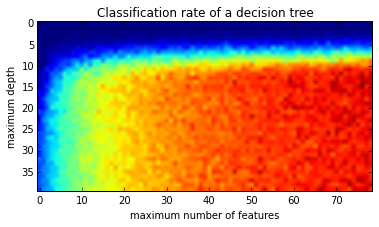


Entropy:


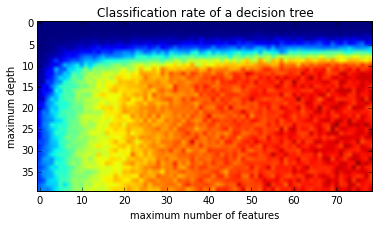

In [128]:
from matplotlib.image import cm

def plot_color_diagram( result_matrix, exponent=1 ):
    if exponent != 1:
        result_matrix = [[x**exponent for x in line] for line in result_matrix]
    
    xlabel('maximum number of features')
    ylabel('maximum depth')
    title('Classification rate of a decision tree')
    
    plt.imshow(result_matrix)
    plt.show()

print('Gini Index:')
plot_color_diagram(result_gini, exponent=8)
print('')
print('Entropy:')
plot_color_diagram(result_entropy, exponent=8)


In [133]:
gini_max = 0.0
entropy_max = 0.0

import itertools

def matr_max(matr):
    max_val = 0
    ind = -1
    n = 0
    for value in itertools.chain(*matr):
        if value > max_val:
            ind = n
            max_val = value
        n += 1

    max_pos = (ind // len(matr[0]), ind % len(matr[0]))
    
    return (max_val, max_pos[0], max_pos[1])


(entropy_max, e_depth, e_features) = matr_max(result_entropy)
print('entropy: max: %.3f (depth: %d, features: %d)' % (entropy_max, e_depth, e_features))

(gini_max, g_depth, g_features) = matr_max(result_gini)
print('gini: max: %.3f (depth: %d, features: %d)' % (gini_max, g_depth, g_features))


entropy: max: 0.893 (depth: 0, features: 307)
gini: max: 0.886 (depth: 0, features: 332)


In [25]:
# store aquired data with pickle module, s.t. it can be easily loaded again

import pickle

name = 'test'

with open('gini_%s.pkl' % name, 'w') as gini_f:
    pickle.dump(result_gini, gini_f)
    gini_f.close()

with open('entropy_%s.pkl' % name, 'w') as entropy_f:
    pickle.dump(result_entropy, entropy_f)
    entropy_f.close()


--------------------
Gini Index:
--------------------


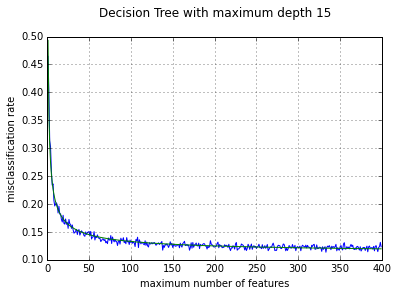

estimated parameters:
	exponent: 	0.609500
	factor: 	0.383617
	constant: 	0.109694
=> classification rate approaches a limit of about 0.890306


--------------------
Entropy:
--------------------


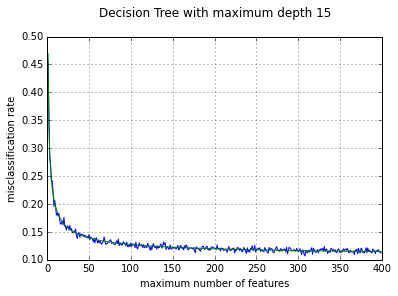

estimated parameters:
	exponent: 	0.606275
	factor: 	0.364582
	constant: 	0.105064
=> classification rate approaches a limit of about 0.894936


In [135]:
from pylab import *
from scipy import optimize


def fit_vector_with_hyperbola(v):
    Tx = linspace(1, len(v), len(v))
    tX = map(lambda x: 1-v[int(x-1)], Tx)

    fitfunc = lambda p, x: 1 / x**p[0] * p[1] + p[2]
    errfunc = lambda p, x, y: y - fitfunc(p, x)

    p0 = [1, 1, 0.1]
    # leastsq: error-function, starting estimate for parameters, extra arguments for error-function
    (p1, success) = optimize.leastsq(errfunc, p0, args=(Tx, tX))

    plot(Tx, tX, Tx, map(lambda xl: fitfunc(p1,xl), Tx))
    
    xlabel('maximum number of features')
    ylabel('misclassification rate')
    title('Decision Tree with maximum depth 15\n')
    grid(True)
    #savefig("diagram.png")
    show()

    # print the result of the estimated parameters
    print('estimated parameters:')
    print('\texponent: \t%f' % p1[0])
    print('\tfactor: \t%f' % p1[1])
    print('\tconstant: \t%f' % p1[2])
    print('=> classification rate approaches a limit of about %f' % (1-p1[2]))


print(20*'-')
print('Gini Index:')
print(20*'-')

fit_vector_with_hyperbola(result_gini[0])

print('')
print('')
print(20*'-')
print('Entropy:')
print(20*'-')

fit_vector_with_hyperbola(result_entropy[0])


In [4]:
# the best classifier I have found

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=15,
                                    max_features=308)
classifier.fit(images_training, labels_training)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=308, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

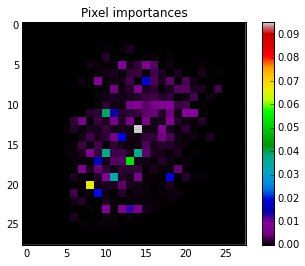

In [9]:
# render the pixel importances

import matplotlib.pyplot as plt
from matplotlib.image import cm

plt.title('Pixel importances')
plt.imshow(classifier.feature_importances_.reshape((28,28)),
           cmap=cm.spectral, interpolation='none')

clbar = plt.colorbar()
plt.show()

In [ ]:
# render the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

try:
    import pydot
    
    dot_data = StringIO() 
    export_graphviz(classifier,
                    out_file=dot_data) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_pdf("decision-tree.pdf")
    print('created PDF-file')

except ImportError:
    # ImportError: pydot is not existing (probably working in python3)
    with open("/home/raphael/Dokumente/MLlab/data/one-feature-tree.dot", 'w') as f:
        f = export_graphviz(classifier, out_file=f)
    print('created dot-file')


In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier_test = mnistdb_classifier_test(RandomForestClassifier())
forest_classifier_test.train()
forest_classifier_test.test()


In [34]:
print( forest_classifier_test.stats() )
print( forest_classifier_test.get_precision() )

[[ 964    0    0    1    0    3    7    1    4    0]
 [   0 1119    7    4    0    1    1    1    2    0]
 [  10    2  983    7    3    3    5   12    6    1]
 [   3    3   13  959    1   12    2    7    7    3]
 [   2    2    5    1  942    0    6    2    3   19]
 [   4    2    6   30    3  823    7    4    9    4]
 [   9    3    3    2    7    9  917    0    7    1]
 [   2    8   23    6    9    1    0  964    4   11]
 [   4    1    6   22   12   17    8    8  889    7]
 [  10    6    2   17   21    6    1    5   10  931]]
0.9491


In [48]:
from multiprocessing import Pool

def evaluate_classifier(m_classifier):
    m_classifier.train()
    m_classifier.test()
    return m_classifier.get_precision()

def test_random_forests_estimators(n_estimators_range=range(1, 20), processes=1):
    classifiers = []
    pool = Pool(processes=processes)
    
    for n_estimators in n_estimators_range:
        classifiers.append(mnistdb_classifier_test(RandomForestClassifier(
                                           n_estimators=n_estimators,
                                           criterion='entropy'
                                       )
                                )
        )
    
    return pool.map(evaluate_classifier, classifiers)


def test_random_forests(n_estimators_range=range(1, 20),
                        criterion='entropy',
                        max_depth_range=range(15, 16),
                        max_features=range(308, 309),
                        processes=1
                       ):
    classifiers = []
    pool = Pool(processes=processes)
    
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            for max_features in max_features_range:
                classifiers.append(mnistdb_classifier_test(
                                       RandomForestClassifier(
                                           n_estimators=n_estimators,
                                           criterion=criterion,
                                           max_depth=max_depth,
                                           max_features=max_features
                                       )
                                   )
                                  )
    
    return pool.map(evaluate_classifier, classifiers)


In [49]:
import pickle

pickle.dump( test_random_forests_estimators( range(1,41), 4 ), open('entropy_random_forest.pkl', 'w') )


1 estimators: 0.837100% correctly classified
4 estimators: 0.914600% correctly classified
7 estimators: 0.940500% correctly classified
10 estimators: 0.953500% correctly classified
2 estimators: 0.835600% correctly classified5 estimators: 0.923500% correctly classified8 estimators: 0.943800% correctly classified11 estimators: 0.952300% correctly classified



3 estimators: 0.885800% correctly classified6 estimators: 0.932000% correctly classified9 estimators: 0.949900% correctly classified12 estimators: 0.953000% correctly classified



13 estimators: 0.955100% correctly classified16 estimators: 0.959500% correctly classified19 estimators: 0.957500% correctly classified22 estimators: 0.960600% correctly classified



14 estimators: 0.955400% correctly classified17 estimators: 0.956900% correctly classified20 estimators: 0.960000% correctly classified23 estimators: 0.962700% correctly classified



15 estimators: 0.955300% correctly classified18 estimators: 0.959800% correctly classifie

In [11]:
import pickle

entropy_n_estimator_list = pickle.load( open('entropy_random_forest.pkl') )


In [12]:
from pylab import *

Tx = linspace(1, 40, 40)
Ty = map(lambda x: entropy_n_estimator_list[int(x)], Tx)

plot(Tx, Ty)
show()

IndexError: list index out of range